In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing ,Normalising
from sklearn.preprocessing import StandardScaler
#for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier # FOr regresor use Regressor
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, roc_auc_score
%matplotlib inline
#Problem :to build an application to classify the patients  to be healthy or suffering from cardiovascular diseases
#based on the given attributes

In [3]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\cardio data set.csv")
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,Male,168,62.0,110,80,normal,normal,0,0,1,0
1,1,20228,55.419178,Female,156,85.0,140,90,well above normal,normal,0,0,1,1
2,2,18857,51.663014,Female,165,64.0,130,70,well above normal,normal,0,0,0,1
3,3,17623,48.282192,Male,169,82.0,150,100,normal,normal,0,0,1,1
4,4,17474,47.873973,Female,156,56.0,100,60,normal,normal,0,0,0,0


In [4]:
df.shape

(70000, 14)

In [5]:
df.describe()

,id,age_days,age_year,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,164.359229,74.205690,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,8.210126,14.395757,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#we can observe that there is no NAns
# i have deleted id and age_days as it is not related but it is not showing here

In [3]:
df.tail()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,52.712329,Male,168,76.0,120,80,normal,normal,1,0,1,0
69996,99995,22601,61.920548,Female,158,126.0,140,90,above normal,above normal,0,0,1,1
69997,99996,19066,52.235616,Male,183,105.0,180,90,well above normal,normal,0,1,0,1
69998,99998,22431,61.454795,Female,163,72.0,135,80,normal,above normal,0,0,0,1
69999,99999,20540,56.273973,Female,170,72.0,120,80,above normal,normal,0,0,1,0


In [9]:
df.drop('id',axis=1,inplace=True)#without dropping id we cannot drop duplicates so we delete it

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(69976, 13)

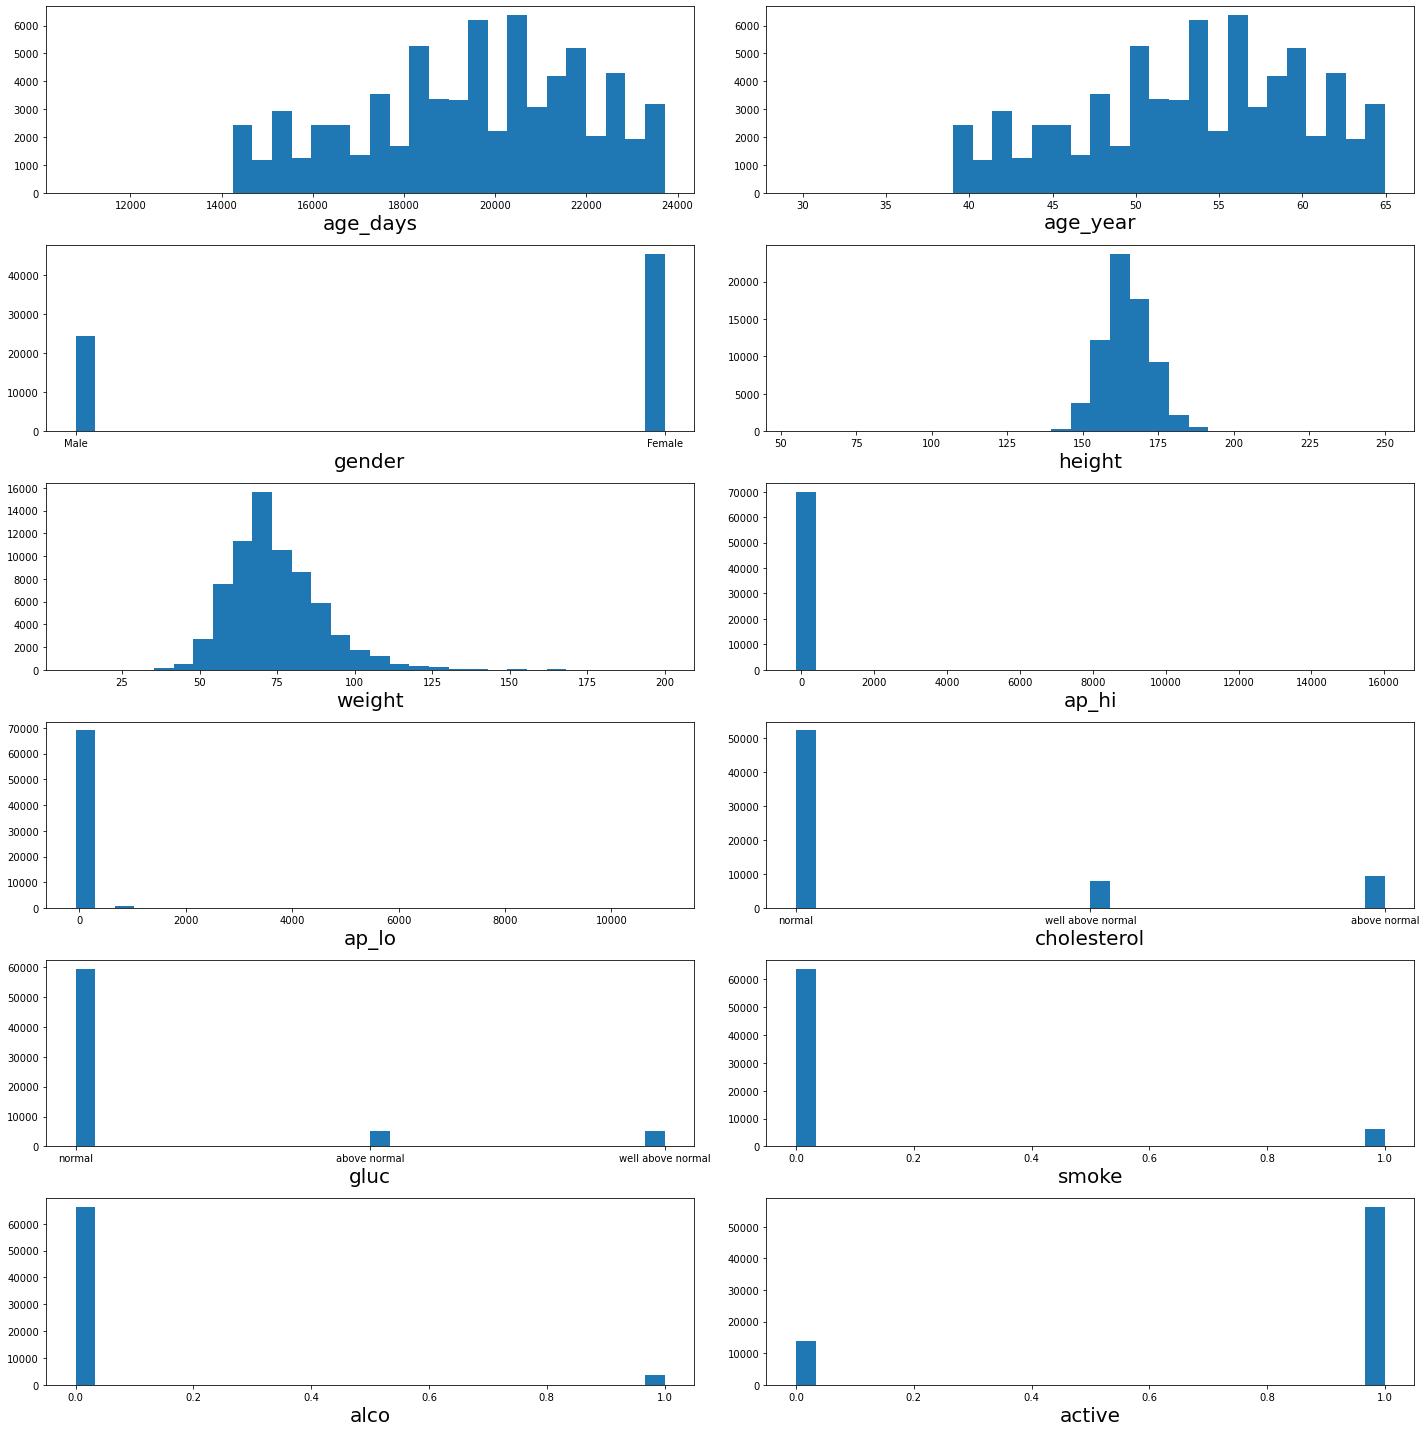

In [12]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


In [ ]:
#Lets not worry for categorical colums
#But we can see skewness is age_year ,height weight, ap high, ap low 
#We want to remove skewness now earlier we use in logistic R boxplot,here we will use Zscore(X-mean/std deviation)
#Dont aplly zscore on categorical data

In [13]:
from scipy.stats import zscore
z_score=zscore(df[['age_year','height','weight','ap_hi','ap_lo']])
abs_z_score=np.abs(z_score)#apply the formula and get the scaled data
filtering_entry=(abs_z_score<3).all(axis=1)#all those data which are less than 3std deviation will be stored
df=df[filtering_entry]
df.describe()

,age_days,age_year,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000
mean,19466.951531,53.334114,164.372441,73.569152,126.173552,81.288053,0.087239,0.053187,0.803712,0.492938
std,2467.016002,6.758948,7.692655,13.202960,17.854738,10.235287,0.282187,0.224408,0.397192,0.499954
min,14275.000000,39.109589,140.000000,32.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,48.383562,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,53.978082,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,58.421918,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,64.967123,188.000000,117.000000,401.000000,602.000000,1.000000,1.000000,1.000000,1.000000


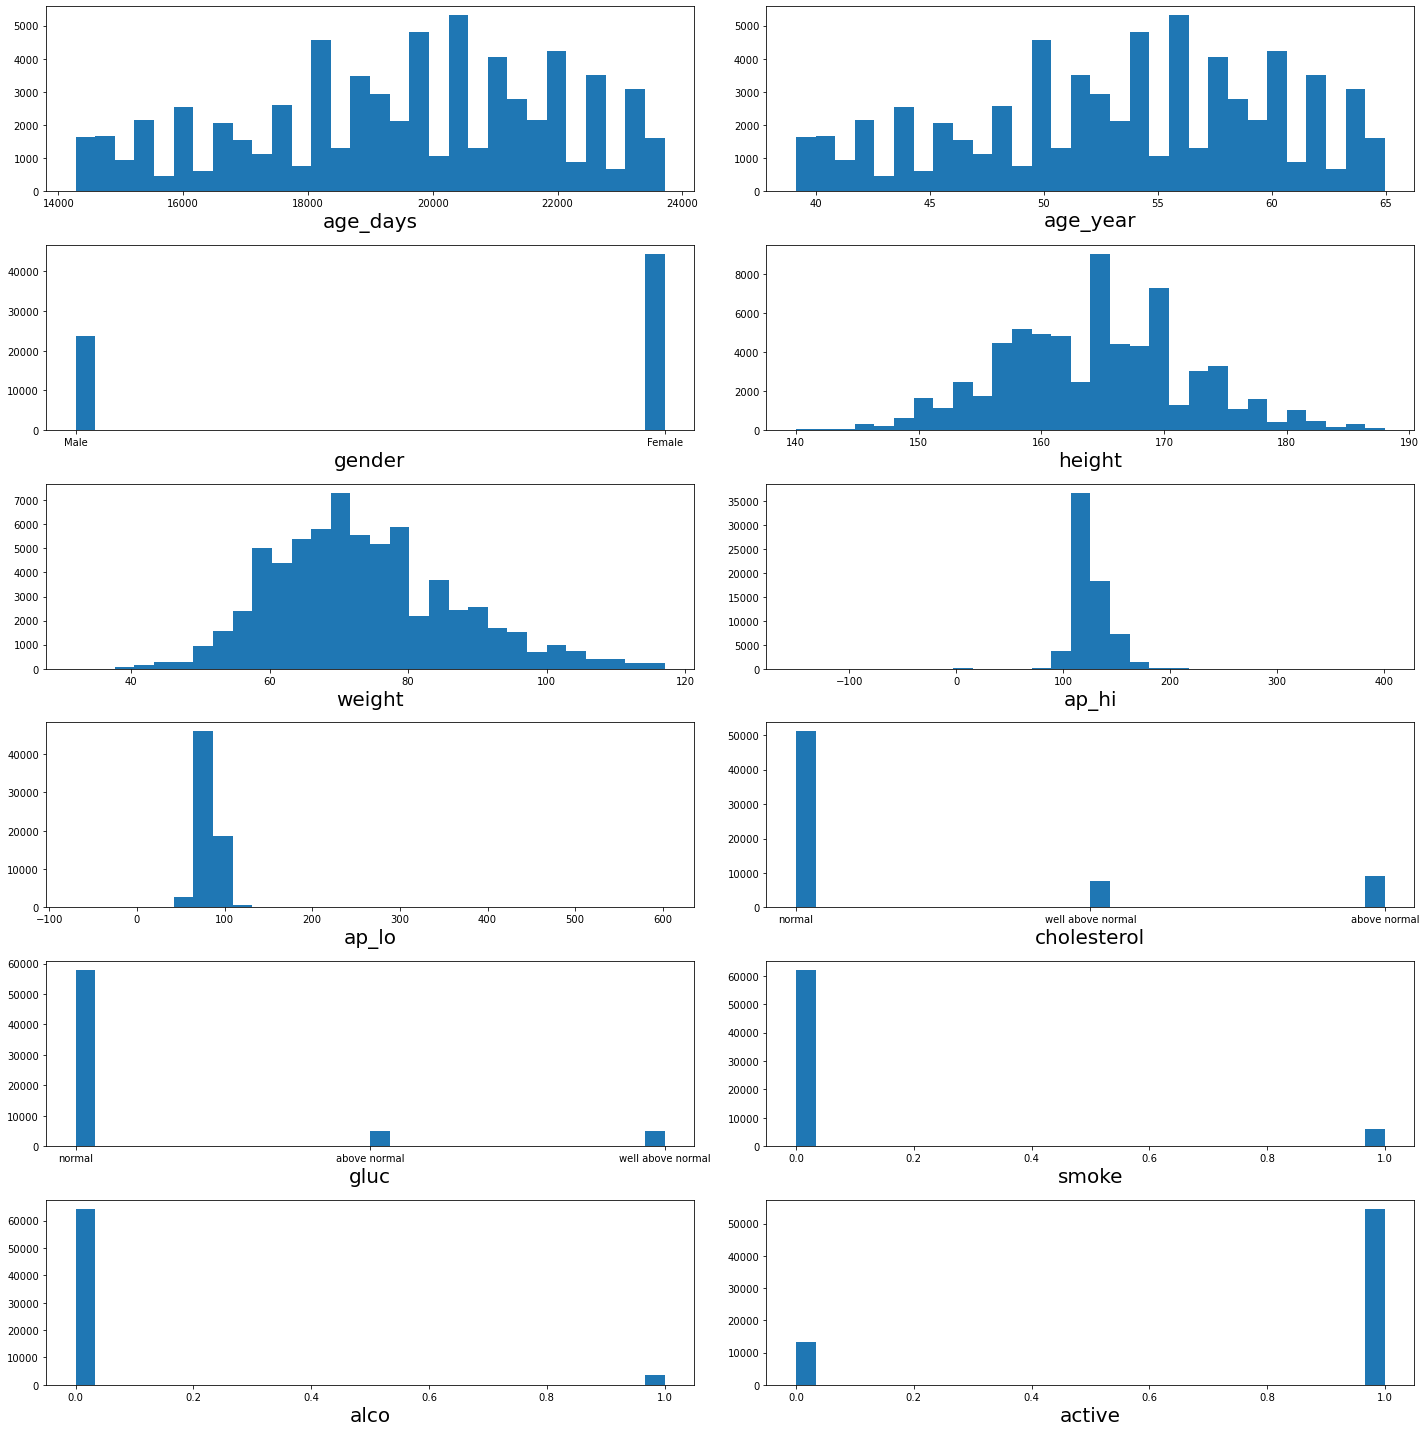

In [14]:
#Lets visualise this new data
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


In [42]:
#From the above figure and comparing with the earlier hist plot we can see that the skewed data are removed

In [16]:
df.head()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.391781,Male,168,62.0,110,80,normal,normal,0,0,1,0
1,20228,55.419178,Female,156,85.0,140,90,well above normal,normal,0,0,1,1
2,18857,51.663014,Female,165,64.0,130,70,well above normal,normal,0,0,0,1
3,17623,48.282192,Male,169,82.0,150,100,normal,normal,0,0,1,1
4,17474,47.873973,Female,156,56.0,100,60,normal,normal,0,0,0,0


In [ ]:
#we can also observe Gender,cholestrol and gluc are ordinal variable and hence convert them to  numericals based on some order

In [23]:
#First we check all the categories
print(df['gender'].value_counts())
print(df['cholesterol'].value_counts())
print(df['gluc'].value_counts())

Female    44409
Male      23634
Name: gender, dtype: int64
normal               51141
above normal          9162
well above normal     7740
Name: cholesterol, dtype: int64
normal               57958
well above normal     5130
above normal          4955
Name: gluc, dtype: int64


In [24]:
#Lets convert them altogether with the help of Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [25]:
ord_enc=OrdinalEncoder(categories=[['Female','Male'],['normal','above normal','well above normal'],
                      ['normal','above normal','well above normal']])
df1=ord_enc.fit_transform(df[['gender','cholesterol','gluc']])
df1

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 2., 0.],
       ...,
       [1., 2., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
#Now lets replace the main databases with these new data in df1

In [27]:
df[['gender','cholesterol','gluc']]=df1

In [28]:
#Letst check if the data has been replaced or not
df.head()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.391781,1.0,168,62.0,110,80,0.0,0.0,0,0,1,0
1,20228,55.419178,0.0,156,85.0,140,90,2.0,0.0,0,0,1,1
2,18857,51.663014,0.0,165,64.0,130,70,2.0,0.0,0,0,0,1
3,17623,48.282192,1.0,169,82.0,150,100,0.0,0.0,0,0,1,1
4,17474,47.873973,0.0,156,56.0,100,60,0.0,0.0,0,0,0,0


In [ ]:
# I have checked and confirmed that the columns are filled with the coreect numerical catrgory

In [45]:
X.shape[1]

11

In [49]:
#We have to convert the categorical column to numbers as ml does not know characters
#print(df['cholesterol'].unique()) #we check how many categories are there
#print(df['gluc'].unique())
#i have done the earlier steps and unique also is another way to check the different names of the category

['normal' 'well above normal' 'above normal']
['normal' 'above normal' 'well above normal']


In [52]:
 #df=pd.get_dummies(df) #dummies is another method to do the same but I have not use it in main model

In [53]:
df.head()

,age_year,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,gender_Female,gender_Male,cholesterol_above normal,cholesterol_normal,cholesterol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal
0,50.391781,168,62.0,110,80,0,0,1,0,0,1,0,1,0,0,1,0
1,55.419178,156,85.0,140,90,0,0,1,1,1,0,0,0,1,0,1,0
2,51.663014,165,64.0,130,70,0,0,0,1,1,0,0,0,1,0,1,0
3,48.282192,169,82.0,150,100,0,0,1,1,0,1,0,1,0,0,1,0
4,47.873973,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0,1,0


In [54]:
#Now we check for multicollinearity  
#X=df.drop(columns=['cardio'])
#y=df['cardio']

In [55]:
#X If we use dummies we will get output in this fashion

,age_year,height,weight,ap_hi,ap_lo,smoke,alco,active,gender_Female,gender_Male,cholesterol_above normal,cholesterol_normal,cholesterol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal
0,50.391781,168,62.0,110,80,0,0,1,0,1,0,1,0,0,1,0
1,55.419178,156,85.0,140,90,0,0,1,1,0,0,0,1,0,1,0
2,51.663014,165,64.0,130,70,0,0,0,1,0,0,0,1,0,1,0
3,48.282192,169,82.0,150,100,0,0,1,0,1,0,1,0,0,1,0
4,47.873973,156,56.0,100,60,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.736986,165,80.0,150,80,0,0,1,1,0,0,1,0,0,1,0
69995,52.712329,168,76.0,120,80,1,0,1,0,1,0,1,0,0,1,0
69997,52.235616,183,105.0,180,90,0,1,0,0,1,0,0,1,0,1,0
69998,61.454795,163,72.0,135,80,0,0,0,1,0,0,1,0,1,0,0


In [30]:
df.describe()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000
mean,19466.951531,53.334114,0.347339,164.372441,73.569152,126.173552,81.288053,0.362153,0.223609,0.087239,0.053187,0.803712,0.492938
std,2467.016002,6.758948,0.476128,7.692655,13.202960,17.854738,10.235287,0.677132,0.569561,0.282187,0.224408,0.397192,0.499954
min,14275.000000,39.109589,0.000000,140.000000,32.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,48.383562,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,53.978082,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,58.421918,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,64.967123,1.000000,188.000000,117.000000,401.000000,602.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.drop(columns='age_days',inplace=True)

In [36]:
df.isnull().sum()

age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#As we can see that we are almost done with the EDA part lets see if we can drop some features which are highly multicolliner
#Since there are less features we will be strict on dropping features.

In [ ]:
#Lets 

In [37]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(df,i) for i  in range(df.shape[1])]
vif["Features"]=df.columns
vif

,vif,Features
0,62.101199,age_year
1,1.859771,gender
2,130.397951,height
3,38.677855,weight
4,87.832859,ap_hi
5,100.955689,ap_lo
6,1.724864,cholesterol
7,1.452249,gluc
8,1.368829,smoke
9,1.204626,alco


In [ ]:
#Here i did not remove the label i,e cardio lets remove and check vif and also i have not standaerize the data since 
#model that I  will be building is Random forest .


In [ ]:
#So,first lets drop  cardio and check.

In [38]:
X=df.drop(columns='cardio')

X.head()

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,1.0,168,62.0,110,80,0.0,0.0,0,0,1
1,55.419178,0.0,156,85.0,140,90,2.0,0.0,0,0,1
2,51.663014,0.0,165,64.0,130,70,2.0,0.0,0,0,0
3,48.282192,1.0,169,82.0,150,100,0.0,0.0,0,0,1
4,47.873973,0.0,156,56.0,100,60,0.0,0.0,0,0,0


In [44]:
y=df['cardio']

In [39]:
#lets do it
vif1=pd.DataFrame()
vif1["vif"]=[variance_inflation_factor(X,i) for i  in range(X.shape[1])]
vif1["Features"]=X.columns
vif1

,vif,Features
0,61.047769,age_year
1,1.854050,gender
2,120.245972,height
3,38.361318,weight
4,83.615912,ap_hi
5,100.482940,ap_lo
6,1.694698,cholesterol
7,1.451472,gluc
8,1.368556,smoke
9,1.204208,alco


In [40]:
#Still the vif are almost same ,lets now standarize the data and then check vif,no other option left ,
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [42]:
#Now Lets apply vif again
vif2=pd.DataFrame()
vif2["vif"]=[variance_inflation_factor(X_scaled,i) for i  in range(X_scaled.shape[1])]
vif2["Features"]=X.columns
vif2


,vif,Features
0,1.071023,age_year
1,1.508324,gender
2,1.520919,height
3,1.222068,weight
4,1.658059,ap_hi
5,1.607518,ap_lo
6,1.317978,cholesterol
7,1.257675,gluc
8,1.249232,smoke
9,1.140165,alco


In [ ]:
#Now we can see that vif are below 5 for all of them and made sure that before using vif we have to standardize the data

In [ ]:
#NO values are above 5 so we cannot remove feature

In [ ]:
# We see multicollinearity now with heat map

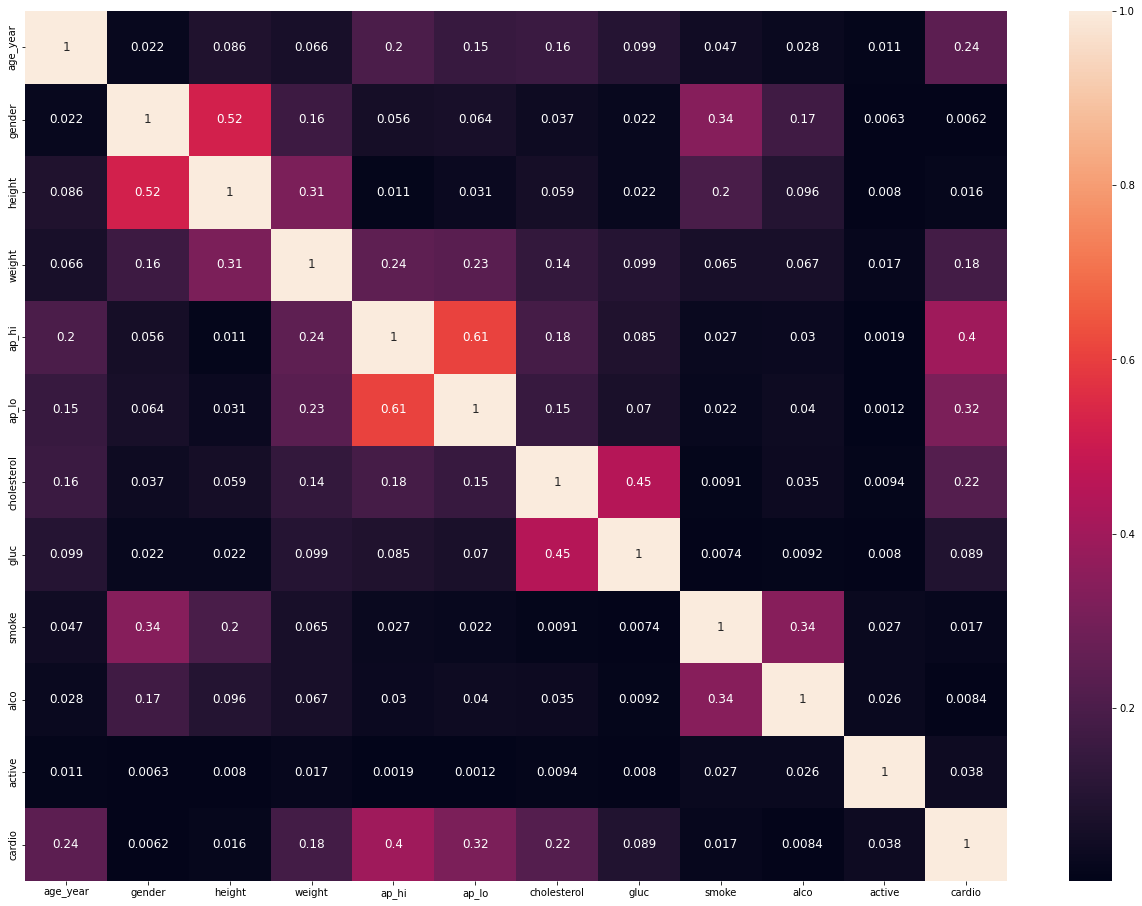

In [43]:
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

In [ ]:
# No score is anywher blw .8 and in minus so we cannot remove any feature

In [ ]:
 #So we will not drop any feature and yoo lets go the model building phase..

In [46]:
#Lets do the hyperparameter tuning using GridSearchCV
#RandomForestClassifier
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=.30,random_state=41)
clf=RandomForestClassifier()
params={'n_estimators':[13,15], #by defauly=t decision tree is the model random forest will use
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]
       
    }
grd=GridSearchCV(clf,param_grid=params)
grd.fit(X_train,Y_train)
print('Best_parameters=>',grd.best_params_)
clf=grd.best_estimator_ #reinstiating the model with best parameters
clf.fit(X_train,Y_train)
y_pred=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred)
print("conf_matrix=>",'\n',rf_conf_mat)
print('\nAccuracy score rf Normal====>',accuracy_score(y_test,y_pred))



Best_parameters=> {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}
conf_matrix=> 
 [[8161 2125]
 [3348 6779]]

Accuracy score rf Normal====> 0.7318865428893352


In [47]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10286
           1       0.76      0.67      0.71     10127

    accuracy                           0.73     20413
   macro avg       0.74      0.73      0.73     20413
weighted avg       0.74      0.73      0.73     20413

